<a href="https://colab.research.google.com/github/WidyaIn/PCVK_Semester5/blob/main/Week5_Widya_Indah_Puspita_Sari_Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : WIDYA INDAH PUSPITA SARI

KELAS : TI-3A

NIM : 2141720034

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


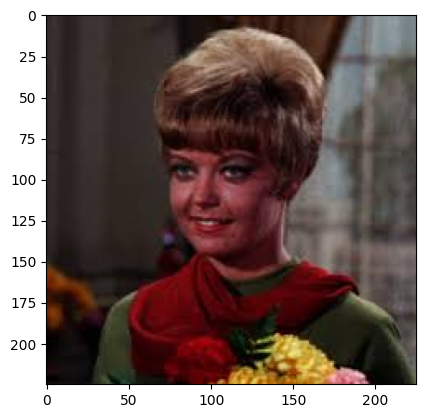

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/Images/female.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Gamma Correction Pada Citra
Masukkan Nilai Gamma : 3


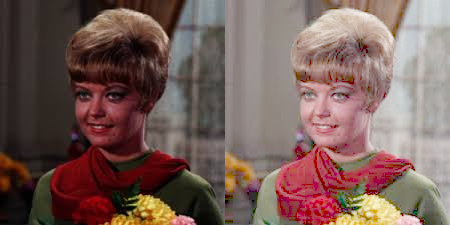

In [3]:
print('Gamma Correction Pada Citra')
print('===========================')
try :
  gamma = int(input('Masukkan Nilai Gamma : '))
except ValueError:
  print('Error, not a number');

original = cv.imread('/content/drive/MyDrive/Images/female.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

#Melakukan Akses Per Piksel dengan 3 Looping

for x in range(original.shape[0]): #looping baris
  for y in range(original.shape[1]): #looping kolom
    for z in range(original.shape[2]): #looping channel
     gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z]/255,(1/gamma)), 0, 255) #pow = pangkat

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**Penjelasan : Kode ini digunakan untuk koreksi gamma yang mengubah tampilan gambar dengan mengatur kecerahan dan kontrasnya. user diminta untuk memasukkana nilai gamma. Kemudian melakukan perhitungan pada setiap pikselnya, lalu menampilkan perbandingan antara gambar asli dan yang sudah diperbaiki. Maka tampilan akhirnya akan berubah. Jadi, kode ini membantu memperbaiki tampilan gambar, membuatnya lebih cerah atau lebih kontras, tergantung pada nilai gamma yang dimasukkan tadi.**

**2.Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.


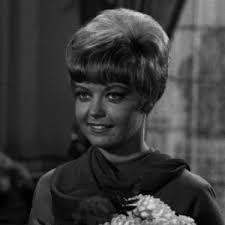

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Images/female.jpg', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img, cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(original)


 Bit Depth Pada Citra 


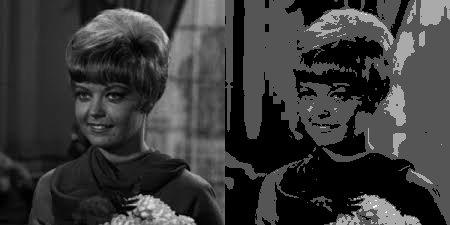

In [5]:

print(' Bit Depth Pada Citra ')
print('======================')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);
depth_image = np.zeros(original.shape, original.dtype)
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**Penjelasan: Pada kode diatas hasil akhirnya adalah perbandingan antara citra asli dan citra dengan Bit Depth yang telah diubah menjadi 2 bit. Dengan mengubah Bit Depth dapat mempengaruhi sejauh mana citra dapat menggambarkan warna dan detailnya.**

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

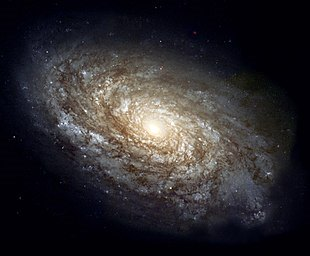

In [15]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
original= cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)


**Jumlah Citra di Average 5**

Nilai MSE adalah 114.50229754704301 (dB)
Nilai PSNR adalah 27.542661597641278 (dB)

Gambar Original                               Gambar Hasil


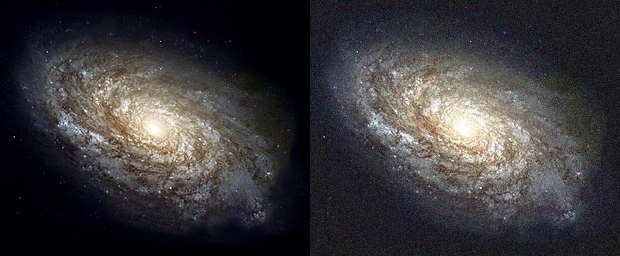

In [17]:

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


**Jumlah Citra di Average 10**

Nilai MSE adalah 114.44806367607526 (dB)
Nilai PSNR adalah 27.544719115367677 (dB)

Gambar Original                               Gambar Hasil


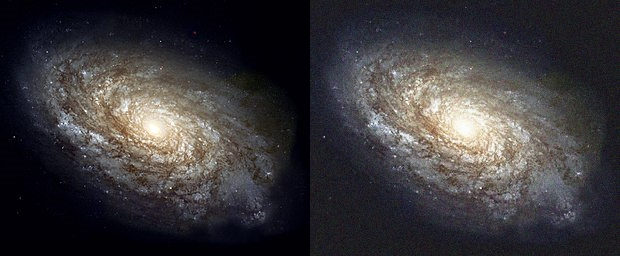

In [19]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 10
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


**Jumlah Citra di Average 20**

Nilai MSE adalah 114.30344842069893 (dB)
Nilai PSNR adalah 27.55021028044898 (dB)

Gambar Original                               Gambar Hasil


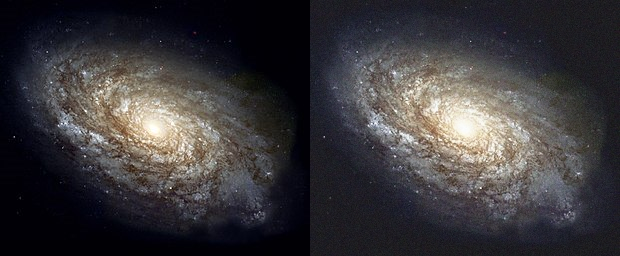

In [21]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 20
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**Jumlah Citra di Average 40**

Nilai MSE adalah 115.64301075268817 (dB)
Nilai PSNR adalah 27.499609709144504 (dB)

Gambar Original                               Gambar Hasil


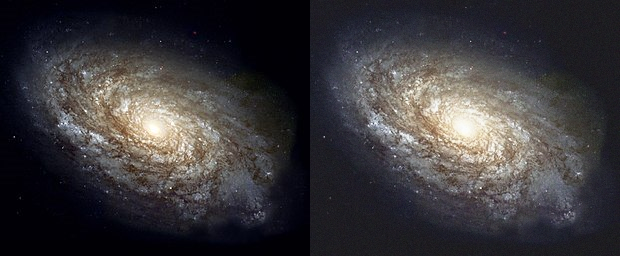

In [22]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 40
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


**Jumlah Citra di Average 80**

Nilai MSE adalah 115.28330813172043 (dB)
Nilai PSNR adalah 27.513139305122046 (dB)

Gambar Original                               Gambar Hasil


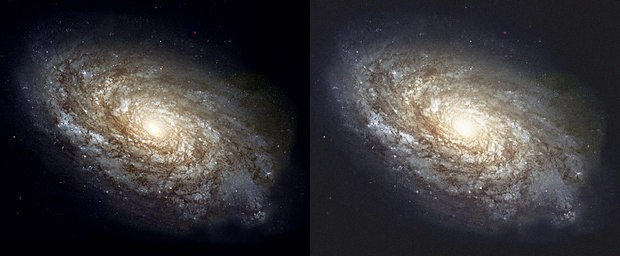

In [23]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 80
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**Jumlah Citra di Average 100**

Nilai MSE adalah 115.01993447580645 (dB)
Nilai PSNR adalah 27.523072450136446 (dB)

Gambar Original                               Gambar Hasil


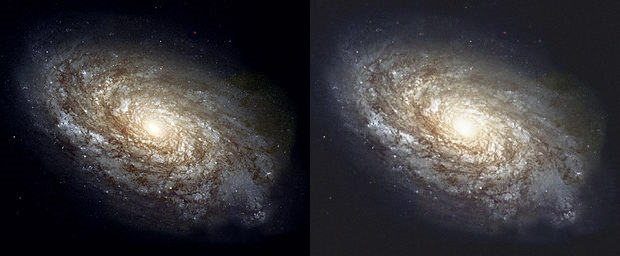

In [24]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**Penjelasan: Kode ini untuk mengevaluasi seberapa baik hasil penggabungan beberapa gambar dengan bobot tertentu dan membantu dalam pemahaman kualitas hasil penggabungan.**

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),sedangkan image paling kanan adalah hasilnya:**

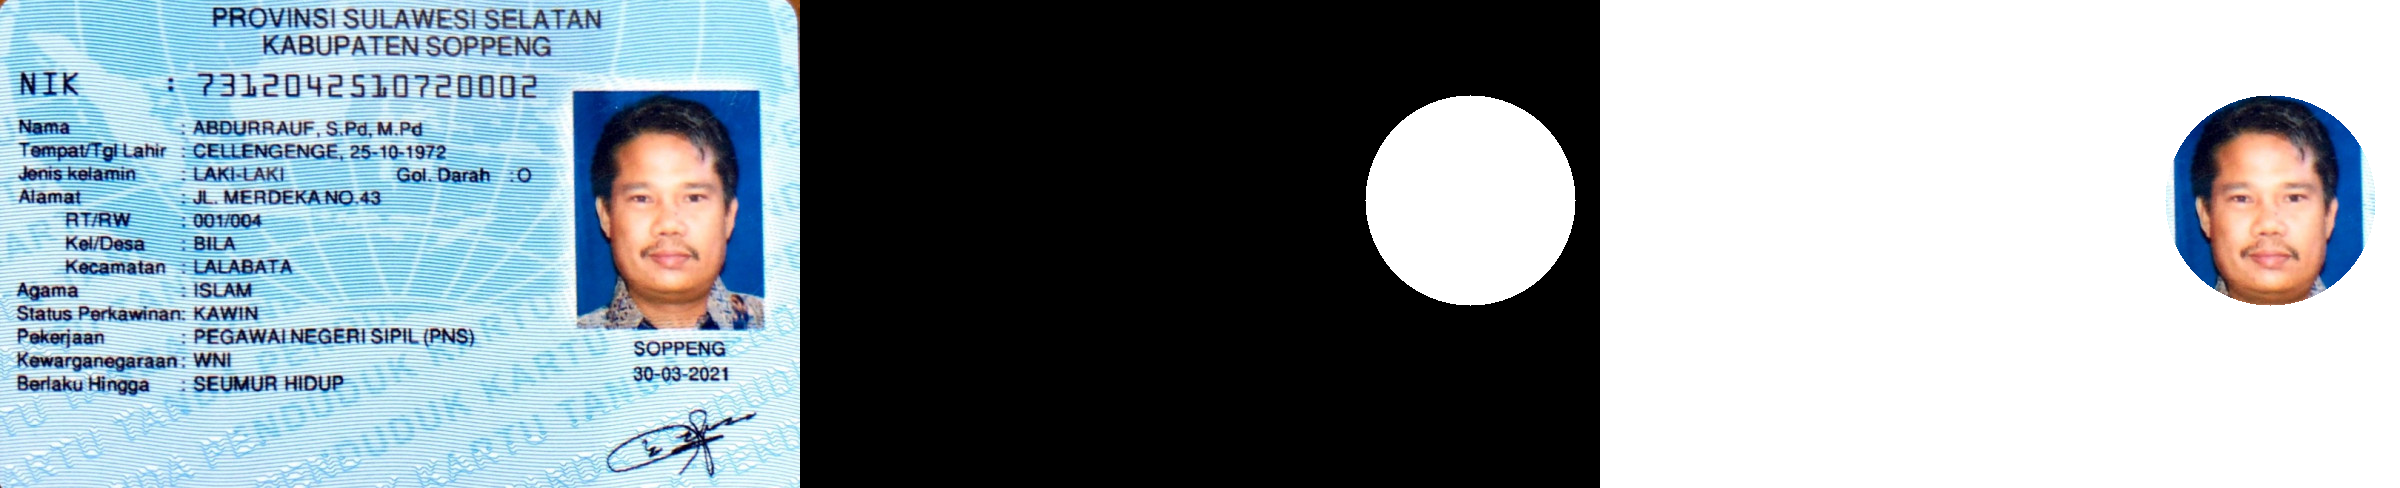

In [59]:
img = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (-70, 40), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu**

**NOT**

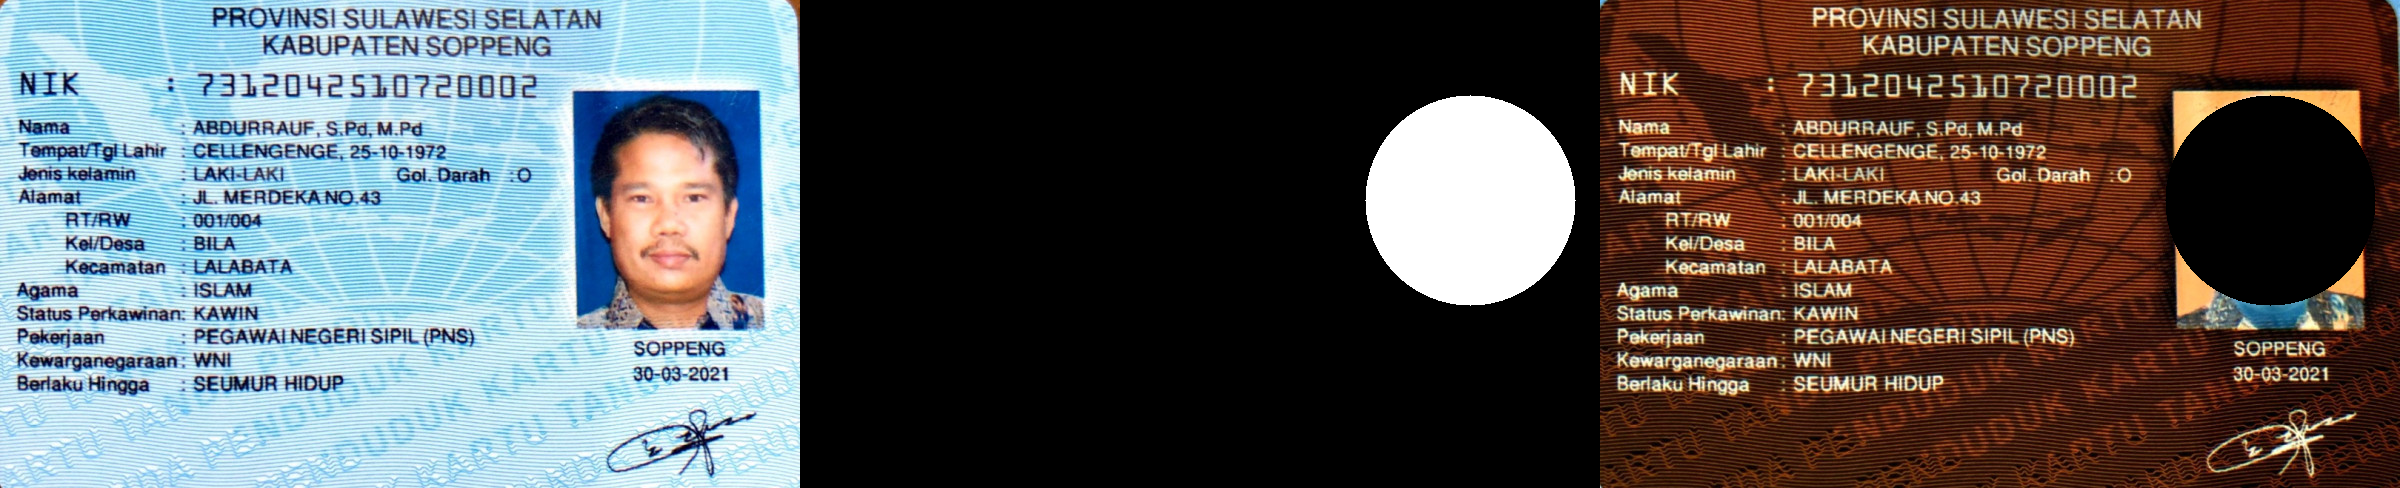

In [62]:
img5 = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img5.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

masked = ~img5 & ~mask

frame_pink = cv.hconcat((img5, mask, masked))
cv2_imshow(frame_pink)

**OR**

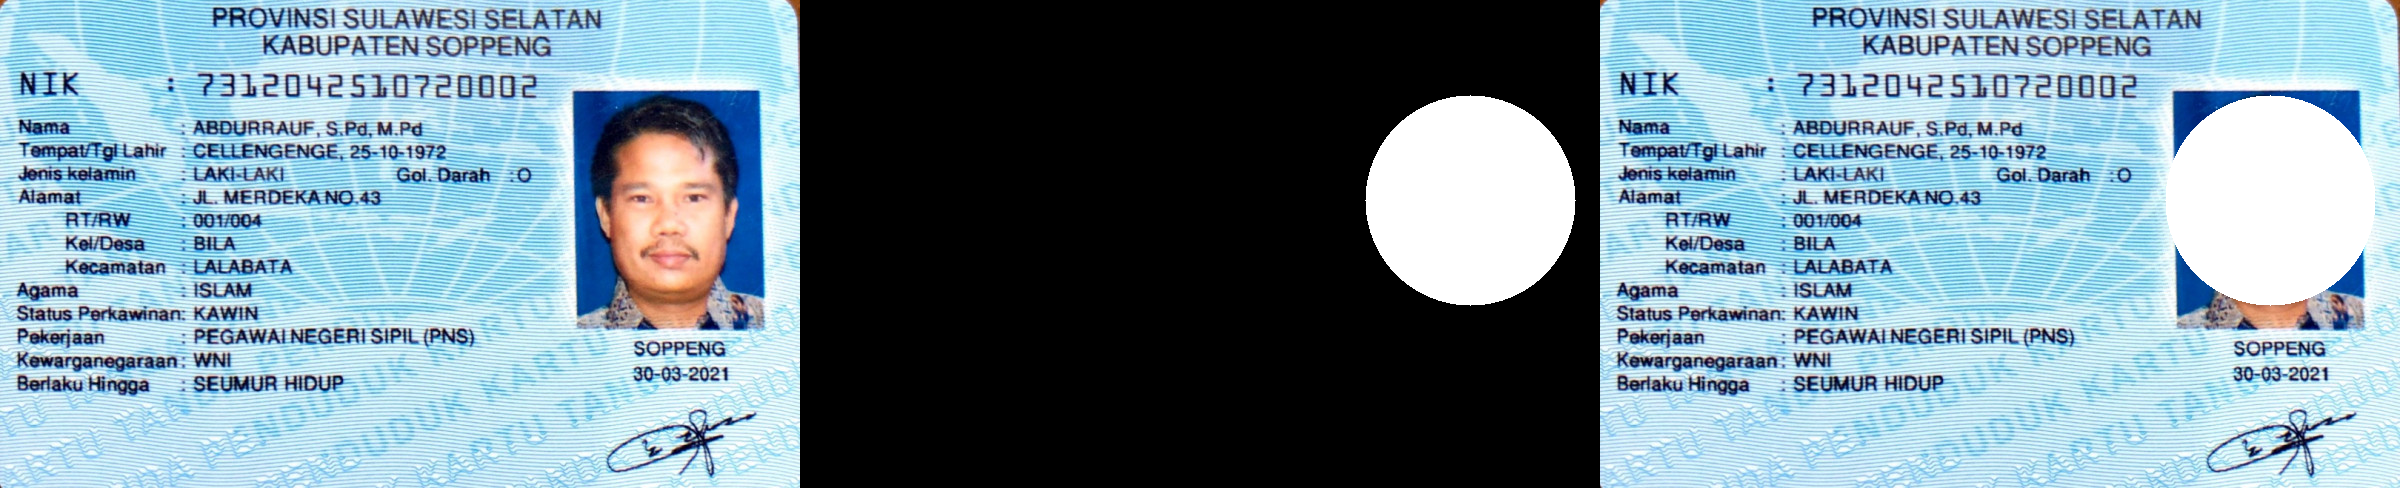

In [63]:

img5 = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img5.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

masked = img5 | mask

frame_pink = cv.hconcat((img5, mask, masked))
cv2_imshow(frame_pink)

**AND**

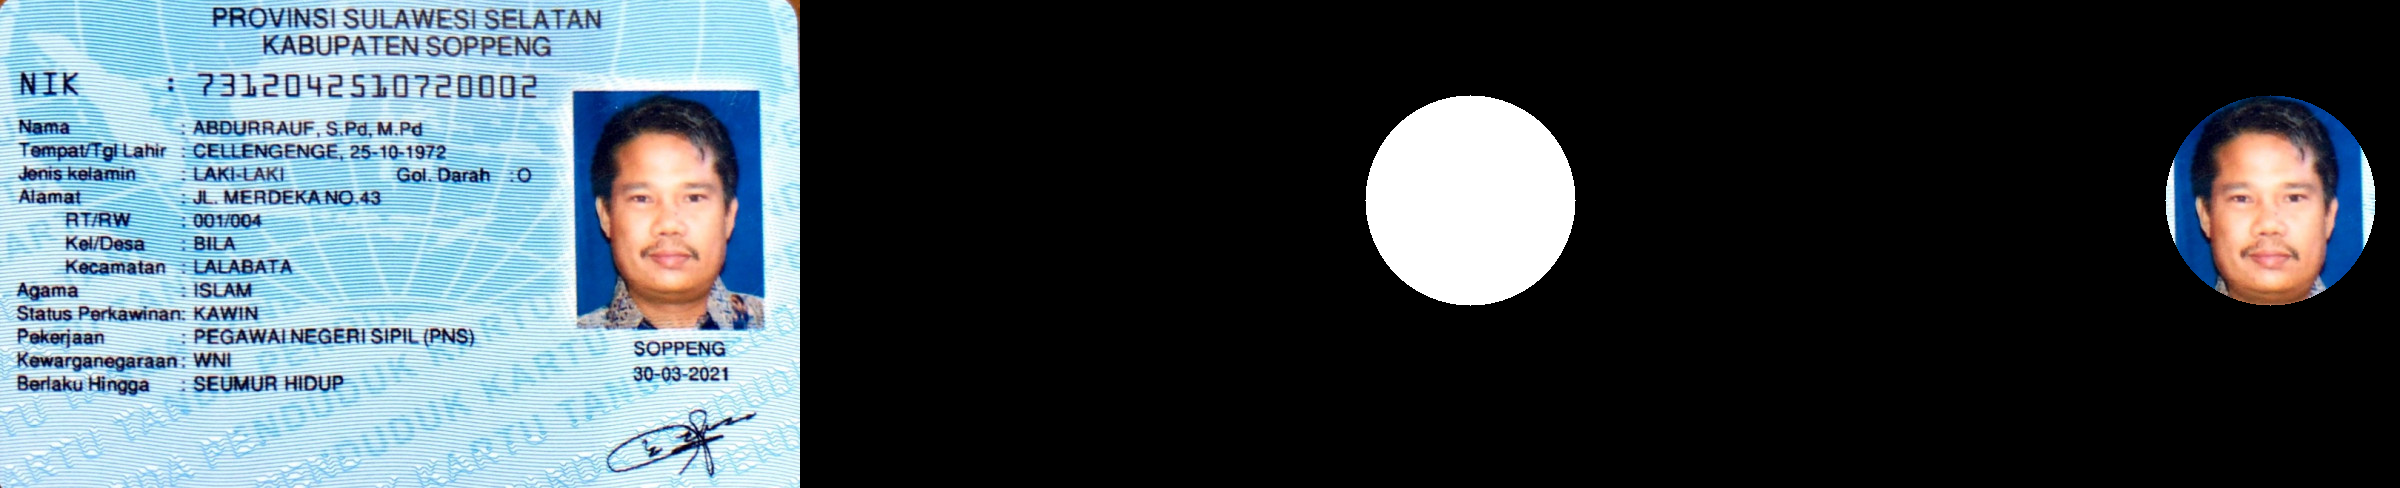

In [64]:

img5 = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img5.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

masked = img5 & mask

frame_pink = cv.hconcat((img5, mask, masked))
cv2_imshow(frame_pink)

**NAND**

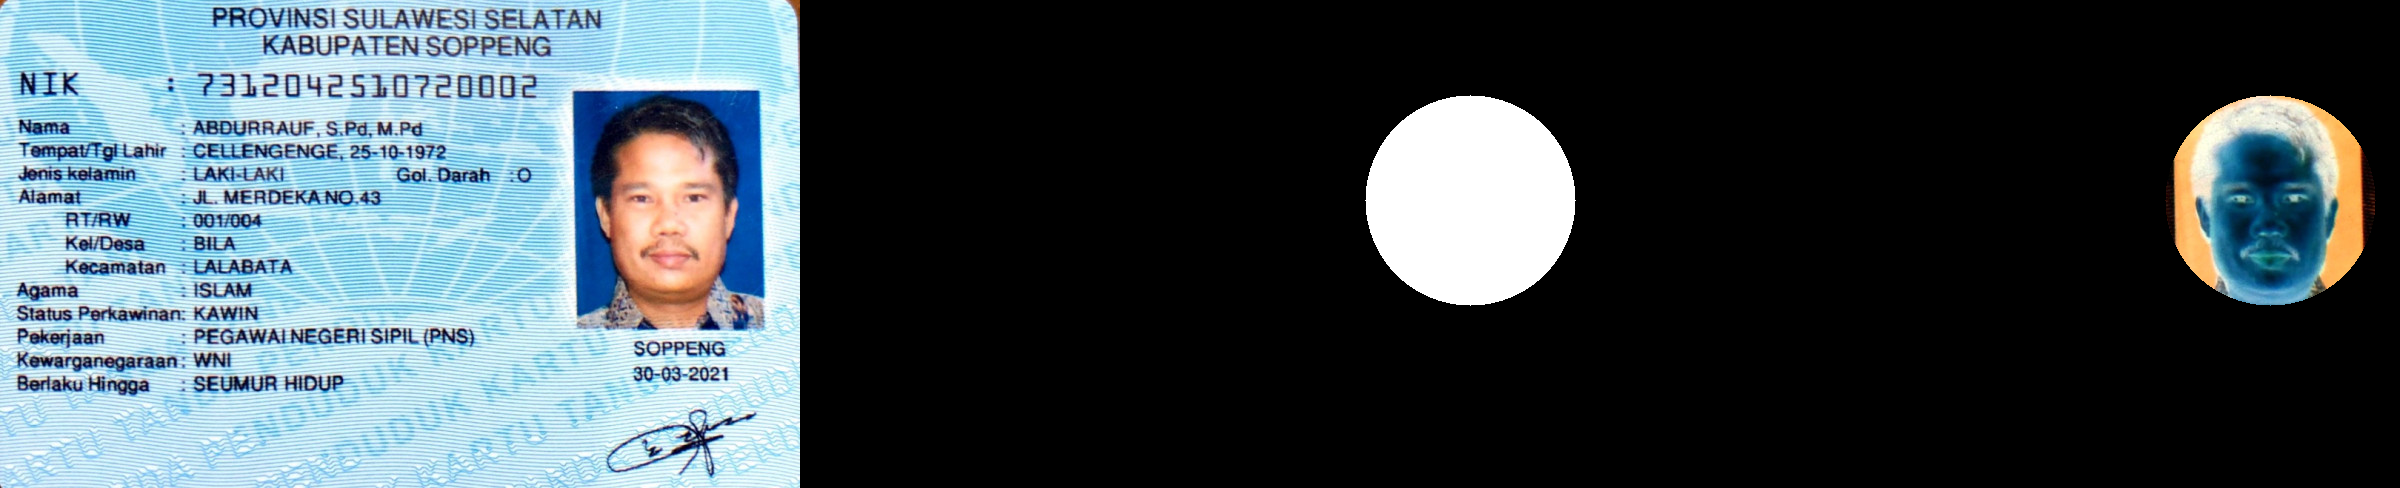

In [65]:
img5 = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img5.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

masked = ~img5 & mask

frame_pink = cv.hconcat((img5, mask, masked))
cv2_imshow(frame_pink)

**XOR**

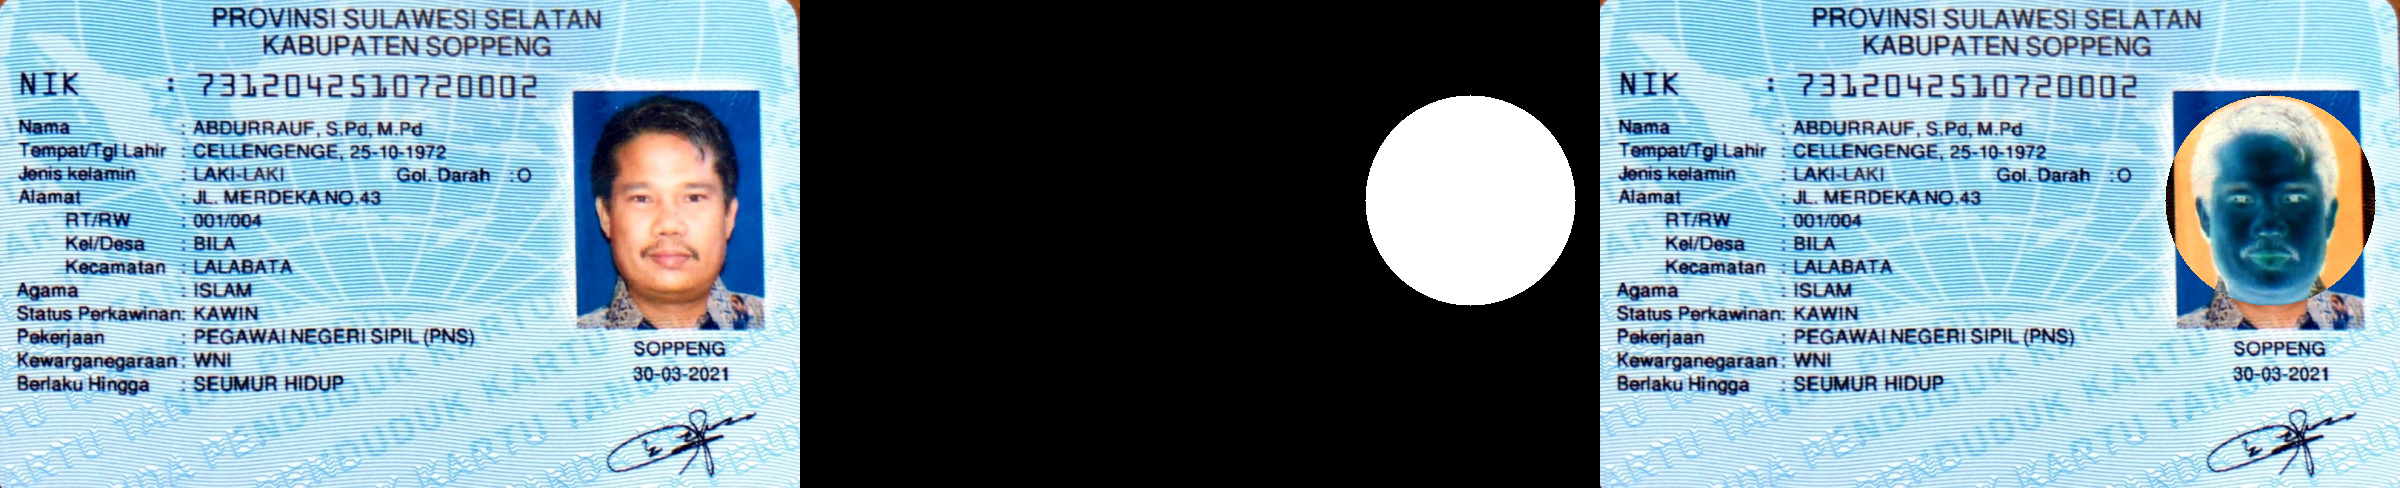

In [66]:

img5 = cv.imread('/content/drive/MyDrive/Images/ktp.jpg')
mask = np.zeros(img5.shape, dtype=np.uint8)
mask = cv.circle(mask, (670, 200), 105, (255,255,255), -1)

masked = img5 ^ mask

frame_pink = cv.hconcat((img5, mask, masked))
cv2_imshow(frame_pink)